In [11]:
%pip install langchain langchain-google-genai python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


generator

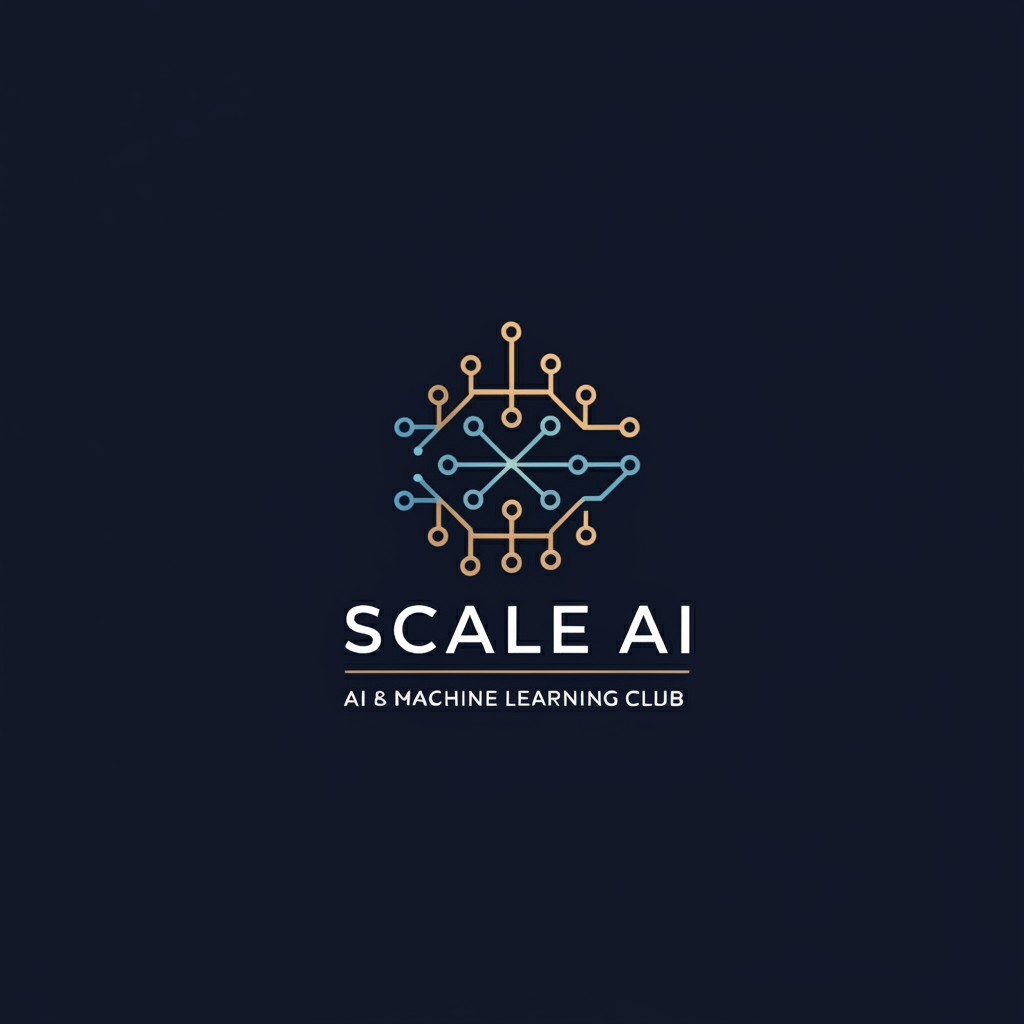

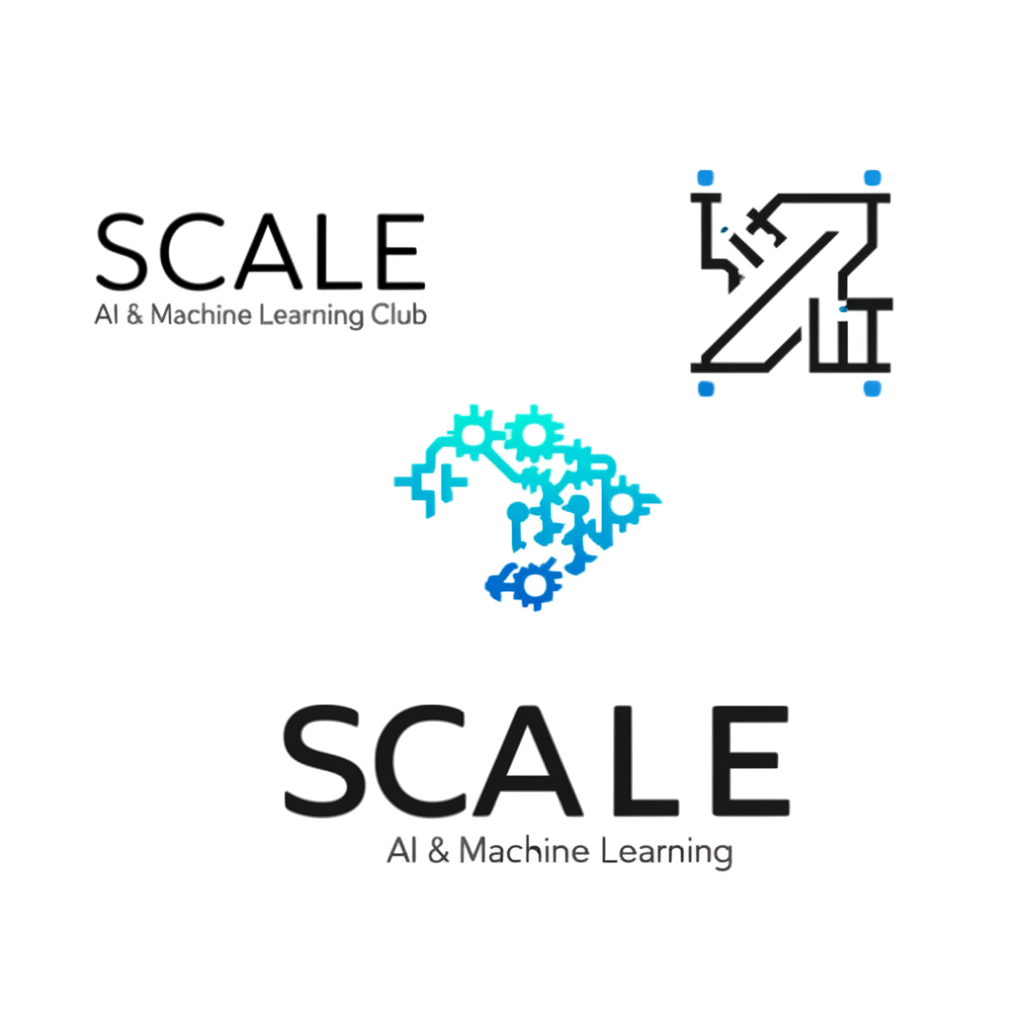

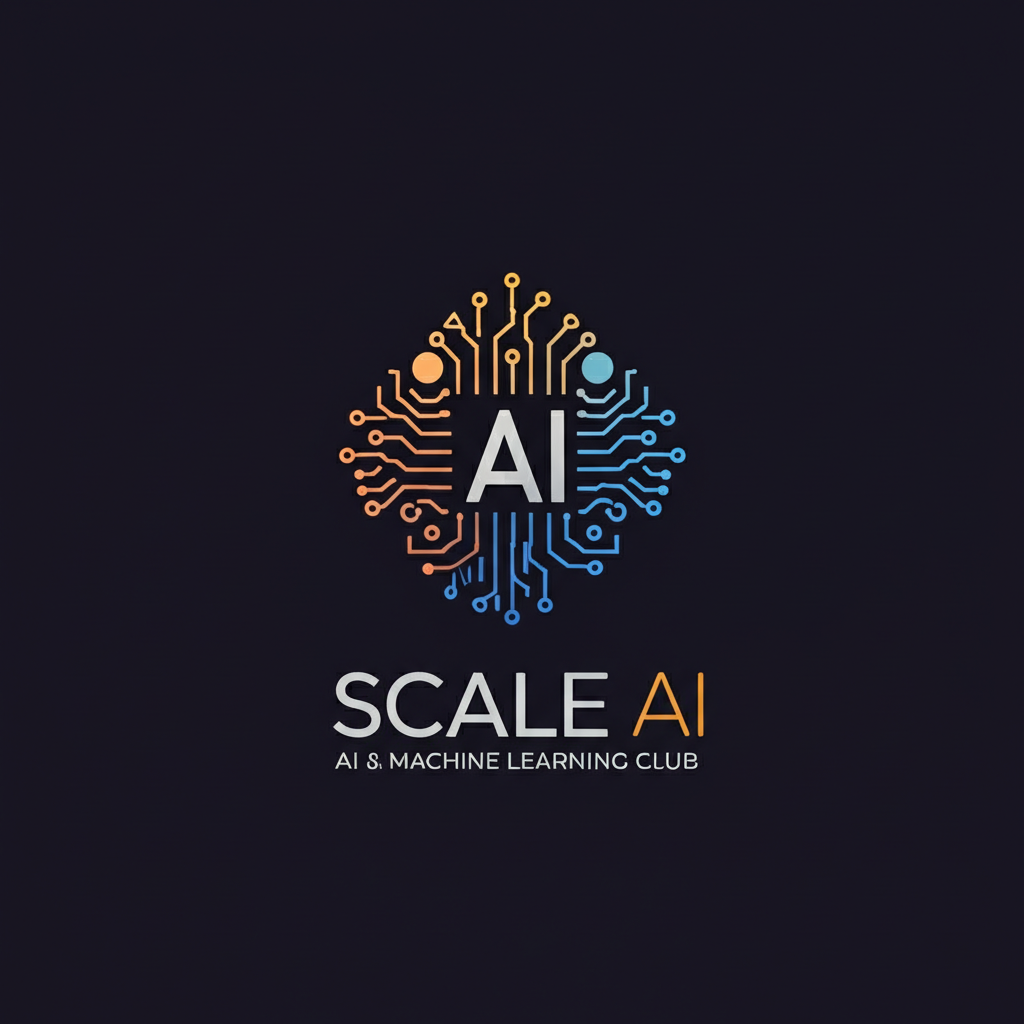

In [6]:
import base64
from IPython.display import Image, display
from langchain_core.messages import AIMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
load_dotenv()

llm = ChatGoogleGenerativeAI(model="models/gemini-2.0-flash-preview-image-generation")
user_input = input("Additional details or preferences for the logo design.")
message = {
    "role": "user",
    "content": f"Generate a professional logo for the SCALE AI & Machine Learning Club at IIT Gandhinagar.Do NOT include any text in the image. Focus on AI and machine learning themes.Make the design simple, modern, abstract, and easily recognizable.Provide multiple distinct logo variations.{user_input}",
}


def _get_image_base64(response: AIMessage) -> None:
    image_block = next(
        block
        for block in response.content
        if isinstance(block, dict) and block.get("image_url")
    )
    return image_block["image_url"].get("url").split(",")[-1]

logo_candidates = []
num_logos = 3
for _ in range(num_logos):
    response = llm.invoke(
        [message],
        generation_config=dict(response_modalities=["TEXT", "IMAGE"])
    )
    image_base64 = _get_image_base64(response)
    logo_candidates.append(image_base64)
    display(Image(data=base64.b64decode(image_base64), width=300))


Judge

--- Starting Logo Review ---

Reviewing Logo 1...


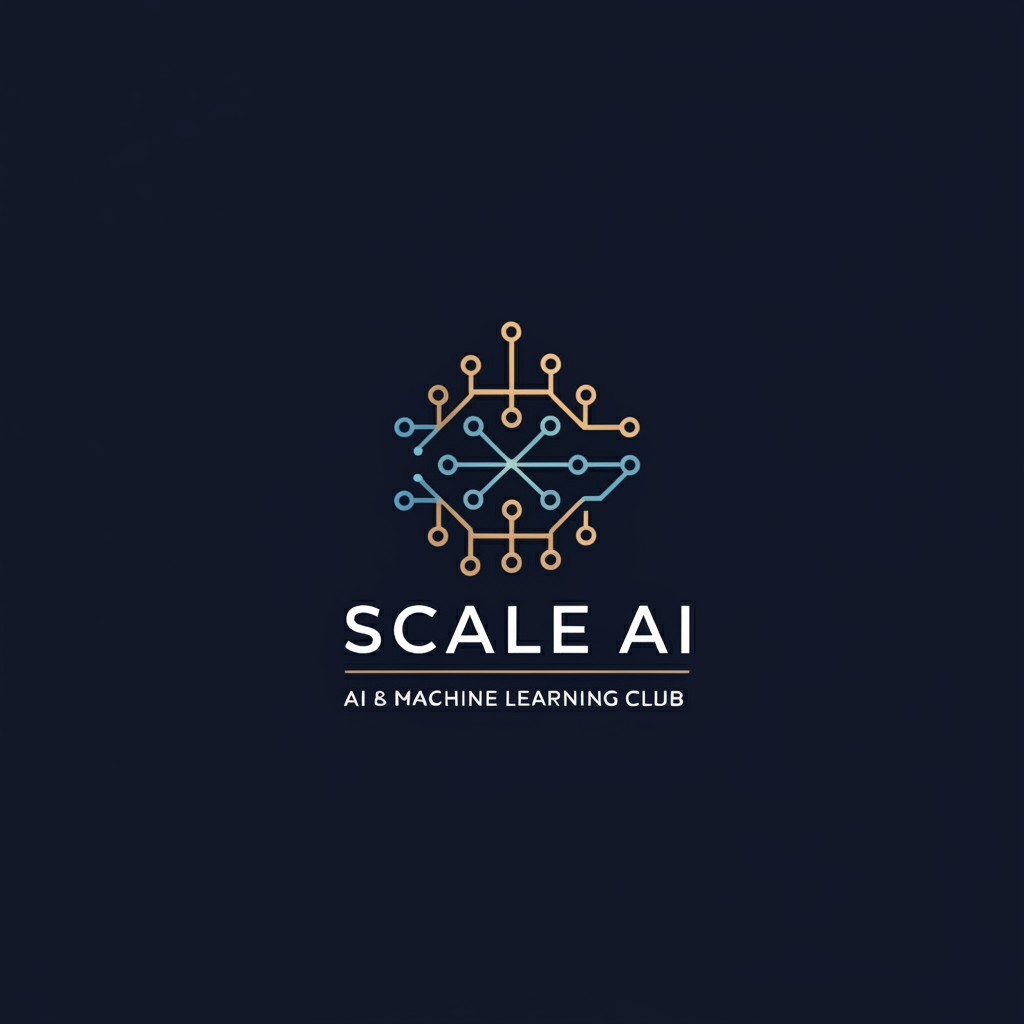

Review: The logo is fairly simple and uses a clean, minimalist style. The central icon effectively conveys a technological theme. However,  it could be improved by reducing the amount of text. The tagline "AI & Machine Learning Club" is unnecessary and clutters the design.  Removing it would significantly enhance the logo's simplicity and impact.

Rating: 7/10

Reviewing Logo 2...


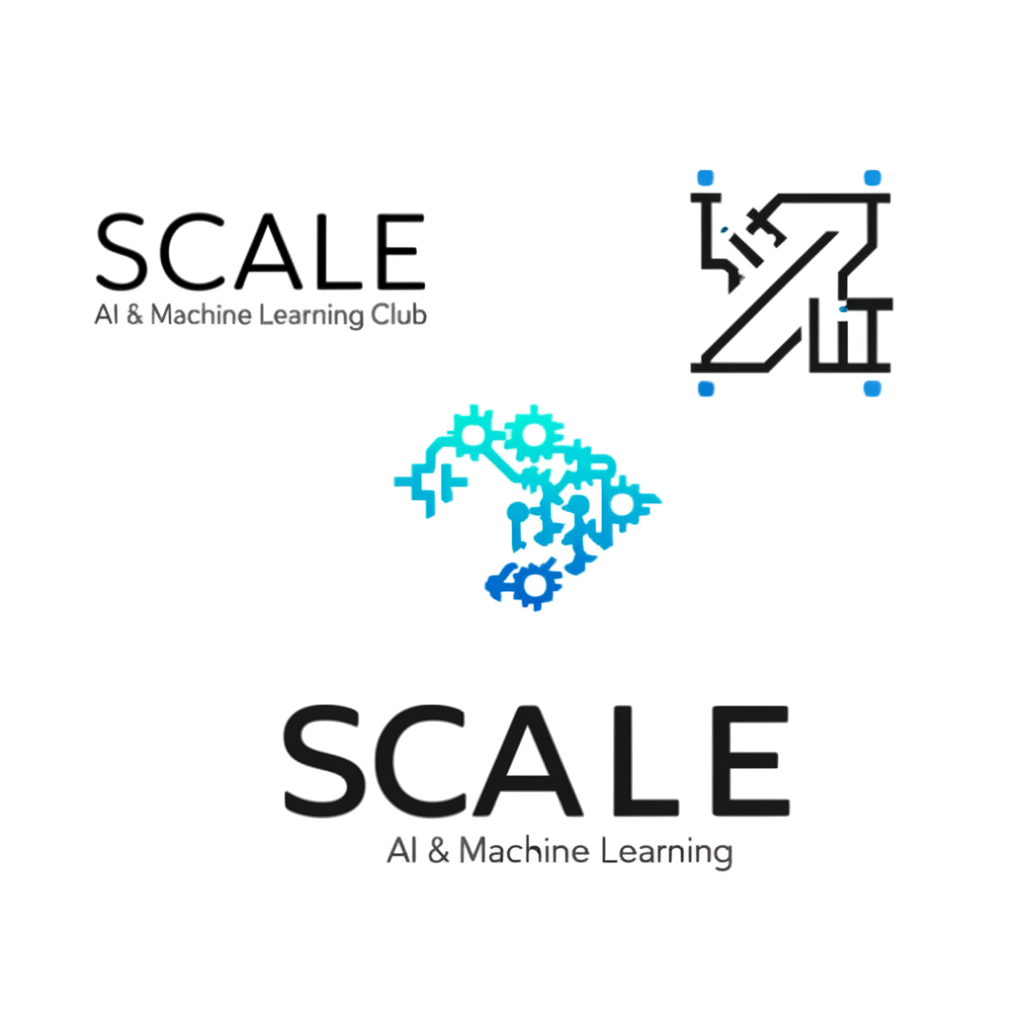

Review: The logo is trying to incorporate too many elements.  The text-based versions are too wordy, violating the "simple and minimal text" requirement. The abstract graphic attempts visual representation but lacks clarity and memorability.  The overall design feels cluttered and lacks a cohesive visual identity.

Rating: 4/10

Reviewing Logo 3...


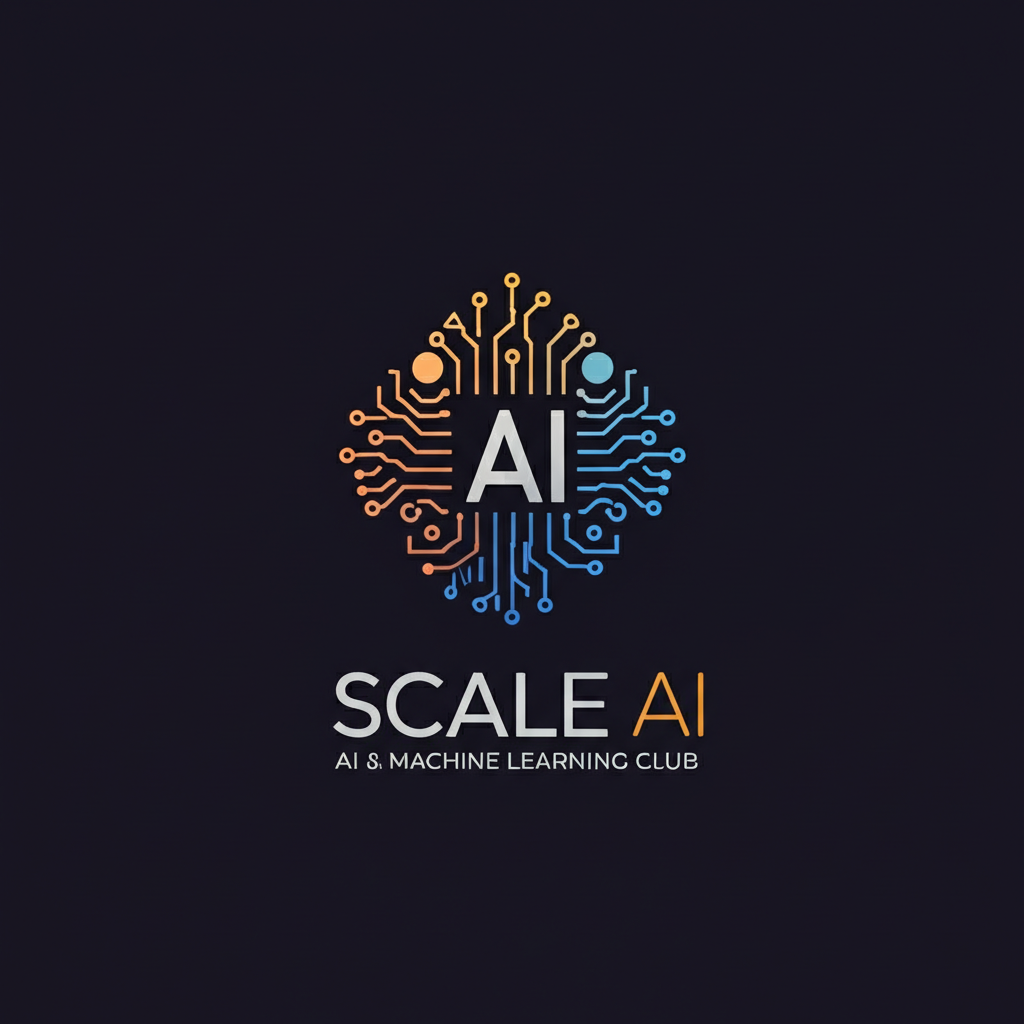

Review: The logo is well-designed, using the "AI" initials effectively within a circuit board design.  The color scheme is modern and appealing. However, the inclusion of "SCALE AI" and the tagline underneath detracts from the simplicity.  A simpler approach would be to just use the central AI circuit design.

Rating: 7/10
logo reviews:
best logo from all reviews: Based solely on the provided reviews, Logo Index 1 is the best.

While Logo Index 3 receives the same rating, the review highlights a significant flaw:  the inclusion of extra text detracts from its design.  The review suggests a way to improve it by removing this text, implying that even in its best possible form, it's still slightly inferior to Logo 1.

Logo 1's review points out a single, easily fixable issue (excess text).  The core design is praised for its simplicity and effectiveness.  Addressing the text issue would likely result in a stronger logo than either of the others, based on the reviewer's assessment.


In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage
from langchain_core.messages import HumanMessage
from IPython.display import Image, display
import base64
from dotenv import load_dotenv
load_dotenv()

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest")


results = []

print("--- Starting Logo Review ---")
for i, logo_b64 in enumerate(logo_candidates):
    print(f"\nReviewing Logo {i+1}...")
    display(Image(data=base64.b64decode(logo_b64), width=200))
    review_message = HumanMessage(
        content=[
            {
                "type": "text",
                "text": f"Review this logo based on the following criteria: '{user_input}'. Provide a concise review and a rating from 1 to 10.",
            },
            {
                "type": "image_url",
                "image_url": {"url": f"data:image/png;base64,{logo_b64}"}
            },
        ]
    )
    response = llm.invoke([review_message])
    print(f"Review: {response.content}")
    
    results.append({
        "logo_index": i + 1,
        "review": response.content
    })

print("logo reviews:")
final_prompt = "You are an expert logo designer and reviewer. Below are the reviews for each logo generated for the SCALE AI & Machine Learning Club at IIT Gandhinagar:\n\n"
for r in results:
    final_prompt += f"\nLogo Index: {r['logo_index']}\nReview: {r['review']}\n"

final_prompt += "\nBased *only* on the reviews provided, select the best logo (by its index number) and explain your decision."

final_response = llm.invoke(final_prompt)

print("best logo from all reviews:", final_response.content)
